# COVID-19 Risk Factors

**Created by Data Scientists at Booz Allen Hamilton**
* Jo C.
* Tirik F.
* Joseph J.
* Colin L.
* David T.
* Shawn W.

With significant subject matter expertise from Erin M.

What puts someone at risk of developing severe symptoms from a COVID-19 infection? Unfortunately, with nCOV-19 being novel, the answer is unclear. However, using available data and cross referencing with published work on other coronavirus outbreaks, we can infer what risk factors may be present. The Booz Allen team used several approaches and techniques to try to aid in understanding not just the dataset, but also what relevant information was contained within these papers. The team knew that they lacked the significant medical expertise to make judgments from the data, so they followed an approach of "delivering the right results at the right time to the right person." In that sense, the final model pulls excerpts from articles that it believes answers whether a known risk factor is likely to be significantly present in COVID-19 outbreaks. 

In the next iteration, the team hopes to advance the techniques developed here to refine understanding of the needs and create a tool capable of aiding researchers in their quest to understand and act against COVID-19.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Loads" data-toc-modified-id="Imports-and-Loads-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Loads</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#TF-IDF-with-Keywords" data-toc-modified-id="TF-IDF-with-Keywords-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>TF-IDF with Keywords</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions-to-Clean-the-Abstracts" data-toc-modified-id="Helper-Functions-to-Clean-the-Abstracts-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Helper Functions to Clean the Abstracts</a></span></li><li><span><a href="#Clean-and-Create-TFIDF-Matrix" data-toc-modified-id="Clean-and-Create-TFIDF-Matrix-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Clean and Create TFIDF Matrix</a></span></li><li><span><a href="#Search-for-Abstracts-With-Keywords" data-toc-modified-id="Search-for-Abstracts-With-Keywords-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Search for Abstracts With Keywords</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#LDA" data-toc-modified-id="LDA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LDA</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions-and-Classes" data-toc-modified-id="Helper-Functions-and-Classes-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Helper Functions and Classes</a></span></li><li><span><a href="#Data-Cleaning-and-Preprocessing" data-toc-modified-id="Data-Cleaning-and-Preprocessing-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Data Cleaning and Preprocessing</a></span></li><li><span><a href="#Build-the-Bigrams-and-Trigrams" data-toc-modified-id="Build-the-Bigrams-and-Trigrams-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Build the Bigrams and Trigrams</a></span></li><li><span><a href="#Update-Stop-Words-and-Remove" data-toc-modified-id="Update-Stop-Words-and-Remove-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Update Stop Words and Remove</a></span></li><li><span><a href="#LDA:-Build-Model" data-toc-modified-id="LDA:-Build-Model-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>LDA: Build Model</a></span></li><li><span><a href="#Visualize-Results-from-Previous-Run" data-toc-modified-id="Visualize-Results-from-Previous-Run-2.2.6"><span class="toc-item-num">2.2.6&nbsp;&nbsp;</span>Visualize Results from Previous Run</a></span></li><li><span><a href="#Model-Metrics" data-toc-modified-id="Model-Metrics-2.2.7"><span class="toc-item-num">2.2.7&nbsp;&nbsp;</span>Model Metrics</a></span></li></ul></li></ul></li><li><span><a href="#The-Right-Information-at-the-Right-Time-to-the-Right-Person" data-toc-modified-id="The-Right-Information-at-the-Right-Time-to-the-Right-Person-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Right Information at the Right Time to the Right Person</a></span><ul class="toc-item"><li><span><a href="#Subsetting-the-Articles" data-toc-modified-id="Subsetting-the-Articles-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Subsetting the Articles</a></span></li><li><span><a href="#Finding-Articles-Relevant-to-Different-Queries" data-toc-modified-id="Finding-Articles-Relevant-to-Different-Queries-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Finding Articles Relevant to Different Queries</a></span></li><li><span><a href="#Ranking-Articles-Based-on-Their-Relevance" data-toc-modified-id="Ranking-Articles-Based-on-Their-Relevance-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Ranking Articles Based on Their Relevance</a></span></li><li><span><a href="#Creating-an-Overall-Score" data-toc-modified-id="Creating-an-Overall-Score-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Creating an Overall Score</a></span></li></ul></li><li><span><a href="#Text-Summarization" data-toc-modified-id="Text-Summarization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Text Summarization</a></span><ul class="toc-item"><li><span><a href="#Example-('risks-for-neonates,-newborns,-and-pregnant-women')" data-toc-modified-id="Example-('risks-for-neonates,-newborns,-and-pregnant-women')-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Example ('risks for neonates, newborns, and pregnant women')</a></span></li></ul></li></ul></div>

## Imports and Loads

This section contains the imports and data loading. Much of the team worked on seperate tasks and to keep the size of the notebook from growing uncontrollably, what is shown here are results with explanations of the process behind the results.

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', -1)

import plotly
import plotly.offline as pyo
import plotly.graph_objects as go

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


import re
import glob
import json
import scipy.sparse
import pickle
from pprint import pprint


from sklearn.feature_extraction.text import CountVectorizer


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import matutils, models


# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
from IPython.display import IFrame, HTML
%matplotlib inline

# Enable logging for gensim - optional
import logging

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


## Exploratory Data Analysis

To determine the contents and segmentation of the available dataset, the team conducted a series of exploratory tasks on the dataset. Since the dataset was so large and varied in topics available, the team used input from Booz Allen subject matter experts (SMEs) to create keyword lists for term frequency - inverse document frequency (tf-idf) and to identify topics following the use of latent Dirichlet allocation (LDA) to group similar datasets together.

While not all of the work done in this exploratory phase is shown here, we included certain excerpts of interest to show our progress.

### TF-IDF with Keywords

As a preliminary approach to the data analysis, the team used tf-idf to analyze the abstracts of the articles to see what abstracts might be of interest. Since the abstracts had an overwhelmingly large corpus, the team used a series of basic SME identified keywords to search on. The key terms are shown below.

In [ ]:
include_terms = ['sars-cov-2', 'covid-19', '2019-ncov', 'ncov-2019', 'betacoronavirus', 'pandemic', 'wuhan', 'virulence', 
                 'incidence', 'prevalence', 'mortality', 'self-resolve', 'immunity', 'community', 'spread' 'olfactory', 
                 'dysfunction', 'osmia', 'respiratory', 'pneumonia']

In [ ]:
# load the data

metadata_path = '../input/CORD-19-research-challenge/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})

# get only the abstracts from the dataframe

abstracts = dict(title = [], abstract = [])

for ind, row in meta_df.iterrows():
    if pd.notna(row['abstract']) and pd.notna(row['title']):
        short = row['abstract'][0:250]
        t = row['title'][0:100]
        abstracts['title'].append(t)
        abstracts['abstract'].append(short)

In [ ]:
pd.DataFrame(abstracts).rename(columns={'title':'Title', 'abstract':'Abstract'}).head()

#### Helper Functions to Clean the Abstracts

Many of these helper functions are sourced from articles written in Towards Data Science and various NLP notebooks on Kaggle.

In [ ]:
def lower(data):
    data = data.lower()
    return data


def remove_punctuation(data):
    symbols = "!\"#$%&()*+./:;<=>?@[\]^_`{|}~\n"
    for i in symbols:
        data = data.replace(i, " ")
    #replace the comma seperately
    data = data.replace(',', ' ')
    return data

def remove_apostraphe(data):
    data = data.replace("'", "")
    return data

def remove_numbers(data):
    nums = "0123456789"
    for i in nums:
        data = data.replace(i, "")
        return data

def remove_stop_words(data):
    stop_words = stopwords.words('english')
    words = word_tokenize(str(data))
    new_text = ""
    for w in words:
        if w not in stop_words and len(w) > 1:
            new_text = new_text + " " + w
    return new_text

#### Clean and Create TFIDF Matrix

In [ ]:
# clean and replace with cleaned words
tf_dict = {}
idf_count = {}
for i, ab in meta_df['abstract'].items():
    if pd.notna(ab):
        sent_dict = {}
        working = ab
        working = lower(working)
        working = remove_stop_words(working)
        working = remove_punctuation(working)
        working = remove_numbers(working)
        working = remove_apostraphe(working)
        working = remove_stop_words(working)
        tokens = working.split(' ')
    
        for word in tokens:
            for inc in include_terms:
                if inc in word:
                    if word in sent_dict.keys():
                        sent_dict[word] = sent_dict[word]+1
                    else:
                        sent_dict[word] = 1
                        if word in idf_count.keys():
                            idf_count[word] = idf_count[word]+1
                        else:
                            idf_count[word] = 1
        tf_dict[i] = sent_dict

In [ ]:
# calculate the tf-idf matrix
index = list(tf_dict.keys())
columns = list(idf_count.keys())
print("There were {} keywords generated from the Included Terms list".format(len(columns)))

#create an empty array for the tf-idf matrix
data = np.zeros((len(index), len(columns)))

#populate the tf-idf matrix
for i, doc in enumerate(index):
    for j, word in enumerate(columns):
        if word in tf_dict[doc]:
            if idf_count[word] !=1:
                data[i][j] = tf_dict[doc][word] * np.log(len(index)/idf_count[word])
            else:
                data[i][j] = np.nan
        else:
            data[i][j] = np.nan
            
#turn the tf_idf matrix into a dataframe
df_tfidf = pd.DataFrame(data, index = index, columns = columns)

In [ ]:
df_tfidf.iloc[:10, :8]

#### Search for Abstracts With Keywords

The team used the keywords of interest to calculate which abstracts had the highest tf-idf scores for those keywords. Most of the keywords used generated non-answers, but community-acquired did give some results, which is shown below.

In [ ]:
cs = df_tfidf['community-acquired']
top_cs = cs.sort_values(ascending=False)[0:10]
final_cs = meta_df['abstract'].iloc[top_cs.index].tolist()
final_cs_title = meta_df['title'].iloc[top_cs.index].tolist()
final_cs_abstra = []
for abstra in final_cs:
    short = abstra[0:250]
    final_cs_abstra.append(short)
    
pd.DataFrame({'Title': final_cs_title, 'Abstract': final_cs_abstra})

#### Conclusion

The investigation into the abstracts showed that some sort of topic filtering or clustering would help narrow down the articles. From that point, the team moved to unstructured clustering using LDA to determine what topic clusters were available for analysis

### LDA

As one would expect with a medical dataset, there was strong overlap in term frequencies and topics represented in the papers. Using the coherency metric, the first pass of the LDA was executed with the number of topics hyper parameter being 35. This helped parse out individual topics of interest while generating clusters of less than useful topics of interest, such as a cluster of topics relating to papers in a language other than English and another cluster of papers which seem to focus on aircraft and industrial health topics.

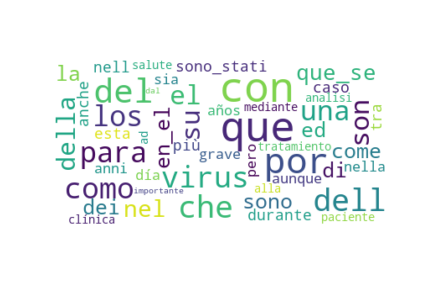
In this image, you can see that the topic cluster is non-English words, indicating the presence of several non-English papers in the dataset.

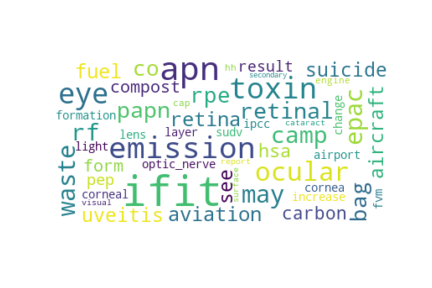
In this image, the topic keywords center around aviation and industry, and lack clear topic markers such as "virus" or "viral." This was extremely useful in not just understanding the data, but filtering out papers which would just add unnecessary noise to the final models. However, while the presence of common keywords in each topic told us they would likely be relevant to us, the overwhelming presence did mean that some sub-topics were obscured.

Below are two word clouds for topics 0 and 1, showing that they appear near identical without further refining.

| 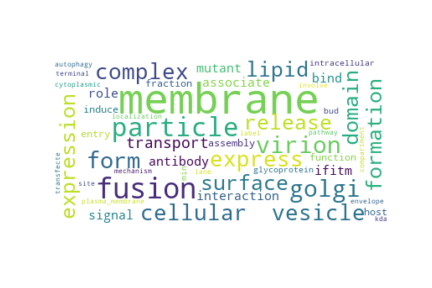 | 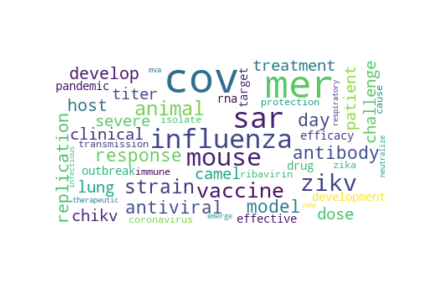
|---|---


Both share the stem "vir" in several of the keywords. In order to gain more insight into the relevant subtopics, any category term occuring in more than 15 of the 35 topics was removed from the keyword list. Topics 0 and 1 now show more granularity.

| 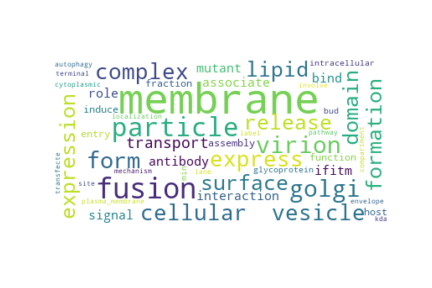 | 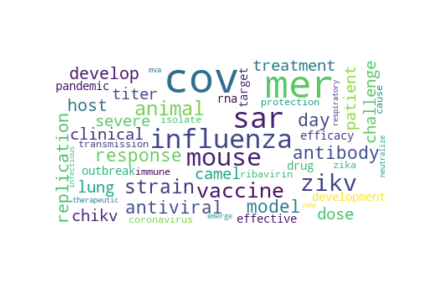
|---|---

Now it's clear that topic 0 deals with the structure of the virus while topic 1 deals with vaccine and responses, most likely in mice. In the cell below is the code used to generate the LDA_vis and the full visualization of how the topics interconnect and overlap. Wordclouds for each topic with both common removed and common kept can be found in the `img` folder.

#### LDA: Build Model

Topic modeling will be performed through the use of Latent Dirichlet Allocation (LDA). LDA is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. To save time on running the model, an embedded html of the output has been added at the end of the LDA section.

Ingest combined article body text. Build models for generating and identifying Bigrams and Trigrams 

In [ ]:
# ingest body text for articles 
df_covid = pd.read_csv('/kaggle/input/subsetlda2/subset1000.csv') # Articles combined. 
text = df_covid.drop(["paper_id","doi","title_abstract_body","Unnamed: 0", "abstract", "title"], axis=1) # drop all columns except body_text
words = []
for ii in range(0,len(text)):
    words.append(str(text.iloc[ii]['body_text']).split(" "))
    
# Build the bigram and trigram models
bigram = gensim.models.Phrases(words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

Utilize the Natural Language Toolkit to ID and remove English, French, and Spanish Stopwords. Extended the stopwords to include Medical terms. Then initialize the English Spacy model for word context. 

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + stopwords.words('spanish') + stopwords.words('french')
stop_words.extend(['doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 'Elsevier', 'PMC', 'CZI'])
# Remove Stop Words
data_words_nostops = remove_stopwords(words)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])
nlp.max_length = 1900000 # increased for size of body texgt 
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

Generate Term Document Frequecy for topic clustering. Create corpus of lemmatized (stemmed) words and ID every word for LDA model. 

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
# Build LDA model with 20 Topics (Reduced Number of Topics for Kaggle)

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           update_every=1,
                                           chunksize=8000,
                                           passes=4,
                                           iterations=400, 
                                           eval_every=None,
                                           alpha='auto',
                                           per_word_topics=True)

Print the top 10 keywords for the 20 topics. An interactive html with the full model run is located in the dataset.

In [ ]:
# Print the Keyword in the 20 topics
from pprint import pprint

pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

#### Visualize Results from Previous Run

To save time on running in this notebook, we have uploaded a previous version of the team's LDA model, with the results shown below. An interactive html is located in the Dataset. 

In [ ]:
from IPython.display import Image
Image('/kaggle/input/ldastaticimages/lda_model-img.jpg', width = 1050)

#### Model Metrics
To save time on running in this notebook, we have uploaded a previous version of the team's LDA model metrics, with the results shown below.

In [ ]:
from IPython.display import Image
Image(filename='/kaggle/input/staticimages/coherences_numTopics.jpg', width = 850) 

## The Right Information at the Right Time to the Right Person

The team knew that in the two weeks they had to work on this first push, they would not be able to give a perfect machine-driven answer. Instead they aimed for the step prior -- to have the machine show the evidence to support a conclusion or query. In short, the team developed a model to process all the articles and deliver back the most relevant information. This information took the form of an excerpt, which contained a sentence identified as most relevant to a question, and the sentences that surrounded it.

### Subsetting the Articles

To do this, the team used a process of several steps. First, a subset of papers was chosen. The articles were filtered on whether they contained keywords related to Covid-19 and the task that we chose to focus on, risk factors. 

First, articles that did not contain any of these keywords were filtered out.

```python
covid19_keywords =['sars-cov-2', 'covid-19', '2019-ncov', 
                   'novel-coronavirus',
                   'coronavirus 2019','wuhan pneumonia',
                   '2019ncov', 'covid19',
                   'sarscov2', 'coronavirus-2019']
```

Then, articles that did not contain any of these keywords were filtered out.

```python
risk_keywords =['smoking', 'immunosuppress', 'pulmonary', 
                'pre-existing', 'co-infection', 'neonate',
               'pregnant', 'socio-economic',
               'economic', 'reproductive number', 'incubation period',
               'serial interval', 'transmission', 'hospitalized',
               'chronic', 'co-morbidity', 'lung', 'respiratory',
               'high-risk', 'pneumonia', 'gastrointestinal']
```

The code used to filter the papers was based on the work done in this notebook https://www.kaggle.com/ajrwhite/covid-19-thematic-tagging-with-regular-expressions/notebook.

### Finding Articles Relevant to Different Queries

After finding this initial subset, work was done to try and identify potential answers to the questions in the risk factor task. The task was split into eight queries, written by the Booz Allen biology SME, and based on the Kaggle task.

In [ ]:
queries = pd.read_csv('../input/covid19-processed-data/queries.csv')

queries.rename(columns={'queries':'Queries'})

Multiple models were used to find papers relevant to these eight queries. 

First, the papers in the subset were split into sentences, and each sentence was embedded using the Universal Sentence Encoder (USE) from Tensorflow (https://tfhub.dev/google/universal-sentence-encoder/4). Each sentece was embedded into a 512 length vector. All these vectors were assembled into an array with each row representing a sentence. The array was stored using a hdf5 file because of its size. This array of sentences was used to train a KNN model. Then, each query was embedded using the USE, and its 20 nearest neighbors were found.

Below is pseudocode for the process taken to do this.

```python
import tensorflow as tf
import tensorflow_hub as hub

from sklearn.neighbors import NearestNeighbors

embed = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

embedded_query = embed('risks for neonates, newborns, and pregnant women')

knn = NearestNeighbors(n_neighbors=20, algorithm='ball_tree').fit(embedded_sentences)

distances, indices = knn.kneighbors(encoded_query.reshape(1, -1))
               
neighbors = unembedded_sentences.loc[indices[0]]                                 
```

For each of the nearest neighbor sentences, the three sentences before and after it (if those sentences existed) were used to form an excerpt.

In [ ]:
use_and_bm25 = pd.read_csv('../input/covid19-processed-data/use_and_bm25.csv')
top5 = use_and_bm25[use_and_bm25['task_id'] == 2].head(5)[['task_text_x','excerpt']]

top5.rename(columns={'task_text_x':'Query', 'excerpt':'Excerpt'})

### Ranking Articles Based on Their Relevance

To improve these results, the BM25 ranking algorithm was incorporated. The articles in the subset were ranked based on their relevance to each of the eight queries; this resulted in a numeric score. Additionally, the articles were ranked on their relevance to a list of Covid-19 keywords; this resulted in another numeric score. 

Below is psuedocode on how to use the BM25 ranking algorithm.

```python
from gensim.summarization import bm25

ranker = bm25.BM25(articles) # 'articles' is a list of articles tokenized by word 
                             # Example - [['article', 'one'],['article', 'two']]
    
scores = ranker.get_scores(query) # 'query' is a search query tokenized by word
                                  # Example - ['search', 'query']
    
# 'scores' will be a n by 1 vector, where n is the number of articles passed into the BM25 constructor.
```

### Creating an Overall Score

For each of the nearest neighbor sentences, there were now two numeric scores associated with the article they came from. These two numeric scores were combined with the reciprocal of the distance metric to create an overall relevancy score.

```python
overall_score = np.log(1 + (1 / distance)) * \
                np.log(1 + bm25_query_rank) * \
                np.log(1 + bm25_covid19_rank)
```

The team used this overall score to rank the identified article excerpts based on their relevance to each query.

## Text Summarization

The goal was to summarize the best articles and provide the user with a concise ‘answer’ to the task question. 

The top results were consolidated utilizing the BERT Executive Summarizer library (references: https://pypi.org/project/bert-extractive-summarizer/ and https://arxiv.org/abs/1906.04165). This tool utilizes the HuggingFace Pytorch Transformers library. It works by embedding the sentences, running a clustering algorithm (kmeans), and finding the sentences that are closest to the cluster's centroids.

Three text summarization approaches were evaluated: single sentence, paragraph, and article abstract. Single sentences were the highest scored sentences that most closely matched the question embeddings. A cutoff score was used to limit results. Paragraphs were obtained by using the sentences as well as the two sentences preceding and following it. Abstracts were collected from the articles containing the highest scored sentences. Model parameters were fine-tuned by trial-and-error and inspecting the results. Summarization of sentences resulted in the most concise and consistent answers. 

### Example ('risks for neonates, newborns, and pregnant women')

```python 
from summarizer import Summarizer

input_tag_sentences = [
    " Therefore, the obstetrical outcomes from pregnant women with SARS-CoV-2 infection appear better than that for pregnant women with SARS. ",    
    " Previous studies have shown no evidence of perinatal SARS infection in infants born to mothers who had SARS infection during pregnancy. ",    
    " There were no moralities among pregnant women or newborns. ",     
    " Thirty-three pregnant women with Covid-19 and 28 newborns were identified. ",
    " When pregnant women become infected with viral pneumonia, they are more likely to have complications and progress to severe cases [8] . ",
    " Whereas pregnant women infected with coronavirus may have an increased risk of adverse neonatal outcomes, gametes do not transmit COVID-19. ",
    " Conclusions: Anaesthesia-related complications occur more frequently in the COVID-19 parturients and their newborns have a high risk of distress. ",
    " Besides, the delivery of infected parturients to designated hospitals was to ensure the safety of the pregnant women and their newborns, while preventing and controlling newborns' infection with SARS-Cov-2. ",
    " Anaesthesia-related complications occurred more frequently in the COVID-19 parturients, while their newborn born also have a high risk of distress and high admission to NICU. ",
    " Pregnant women are susceptible population of SARS-CoV-2 which are more likely to have complications and even progresse to severe illness. ",
    " Pregnant women are susceptible population of COVID-19 which are more likely to have complications and even progresse to severe illness. ",
    " Another study shows that pregnant women with pneumonia have an increased risk of developing low birth weight infants, preterm births, restricted fetal growth, and 5-minute Apgar score <7 compared to healthy pregnant women [10] . ",
    " There is little information about effects of COVID-19 on Pregnant women and newborns as a sensitive population. ",
    " When a baby is born vaginally it is exposed to the mother\'s gut microbiome, therefore if a baby does get infected with coronavirus a few days after birth we currently cannot tell if the baby was infected in the womb or during birth. ",
    " It is known that pregnant women are potentially at increased risk of complications from any respiratory disease due to the physiological changes that occur in pregnancy. ",
    " There is evidence that the use of corticosteroids during pregnancy increase the risk of preterm birth, low birthweight and preeclampsia 34 . ",
    " The COVID-19 infection during pregnancy also increase risks of several adverse outcomes, including higher rates of C-section delivery, low birth weight, and preterm birth. ",
    " treatments, and pregnancy outcomes for the women who have been infected with COVID-19 during their pregnancy. ",
    " An increasing proportion of the women are now infected with this virus during their pregnancy, which may put them in danger in terms of adverse maternal and newborn outcomes. ",
    " Women during pregnancy often face several pregnancy related complications and more susceptible to respiratory pathogens that may put them at higher risk of adverse . "

model = Summarizer()
result = model(''.join(input_tag_sentences))
output_text_summary = ''.join(result)

print(output_text_summary)
    
"The obstetrical outcomes from pregnant women with SARS-CoV-2 infection appear better than that for pregnant women with SARS. There were no moralities among pregnant women or newborns. Anaesthesia-related complications occur more frequently in the COVID-19 parturients and their newborns have a high risk of distress. Pregnant women are susceptible population of COVID-19 which are more likely to have complications and even progresse to severe illness. treatments, and pregnancy outcomes for the women who have been infected with COVID-19 during their pregnancy."
```

### Risk Factor Questions and Answers

In [ ]:
question_answer_summary = pd.read_csv('../input/covid19-processed-data/question_answer_dataframe.csv',
                                      usecols=['RISK_FACTOR_QUESTION',
                                               'ANSWER_SUMMARY',
                                               'TOP_5_ARTICLES'])

qa_summary = question_answer_summary.rename(columns={'RISK_FACTOR_QUESTION':'Query',
                                        'ANSWER_SUMMARY':'Summary',
                                        'TOP_5_ARTICLES':'Top 5 Articles'})
qa_summary[['Query','Summary', "Top 5 Articles"]]

## TODO
Moving forward with this analysis. We hope to integrate the results of TF-IDF, LDA, and the excerpt extraction more closely with one another. More specifically, TF-IDF and LDA could be used to drive the subsetting of articles into meaningful groups. This would hopefully create more reliable and consistent results in the excerpt extraction and text summarization steps.